In [16]:
pip install tensorflow-cpu==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.5 MB/s eta 0:00:00


In [1]:
import pandas as pd

df = pd.read_csv('/content/personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [2]:
print(df.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [3]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing']

for col in num_cols:
     df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
     df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3-2485123592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3-2485123592.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [4]:
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
print(df.dtypes)

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


In [7]:
df['Stage_fear'] = df['Stage_fear'].str.strip().str.capitalize()
df['Drained_after_socializing'] = df['Drained_after_socializing'].str.strip().str.capitalize()

In [8]:
print(df[num_cols].describe())

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2452.000000              2452.000000    2452.000000   
mean           4.188825                 4.200245       3.221044   
std            3.410425                 2.889554       2.214543   
min            0.000000                 0.000000       0.000000   
25%            1.000000                 2.000000       1.000000   
50%            3.000000                 4.000000       3.000000   
75%            7.000000                 7.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2452.000000     2452.000000  
mean              6.589723        3.836868  
std               4.281852        2.917801  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               6.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.

In [9]:
for col in cat_cols + ['Personality']:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


Value counts for Stage_fear:
Stage_fear
No     1399
Yes    1053
Name: count, dtype: int64

Value counts for Drained_after_socializing:
Drained_after_socializing
No     1401
Yes    1051
Name: count, dtype: int64

Value counts for Personality:
Personality
Extrovert    1395
Introvert    1057
Name: count, dtype: int64


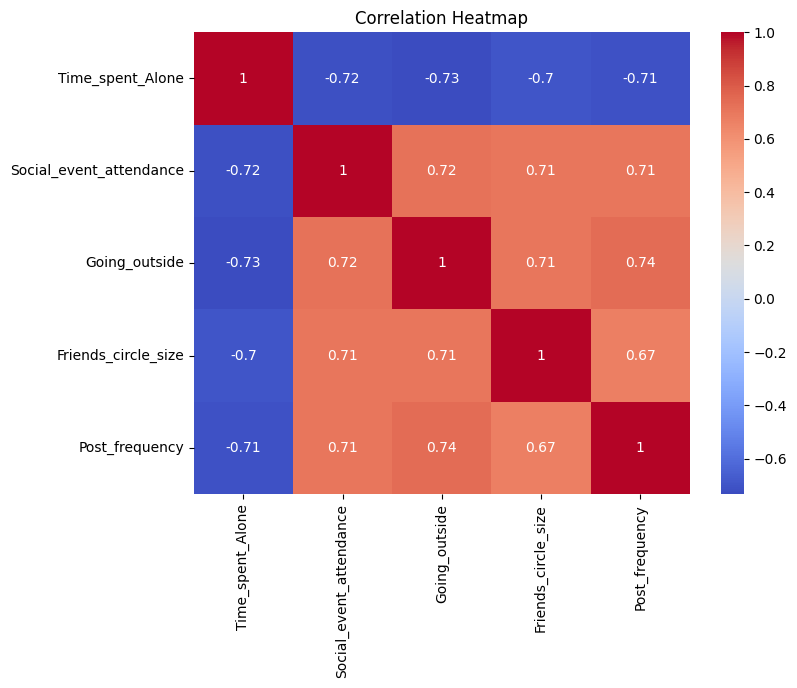

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


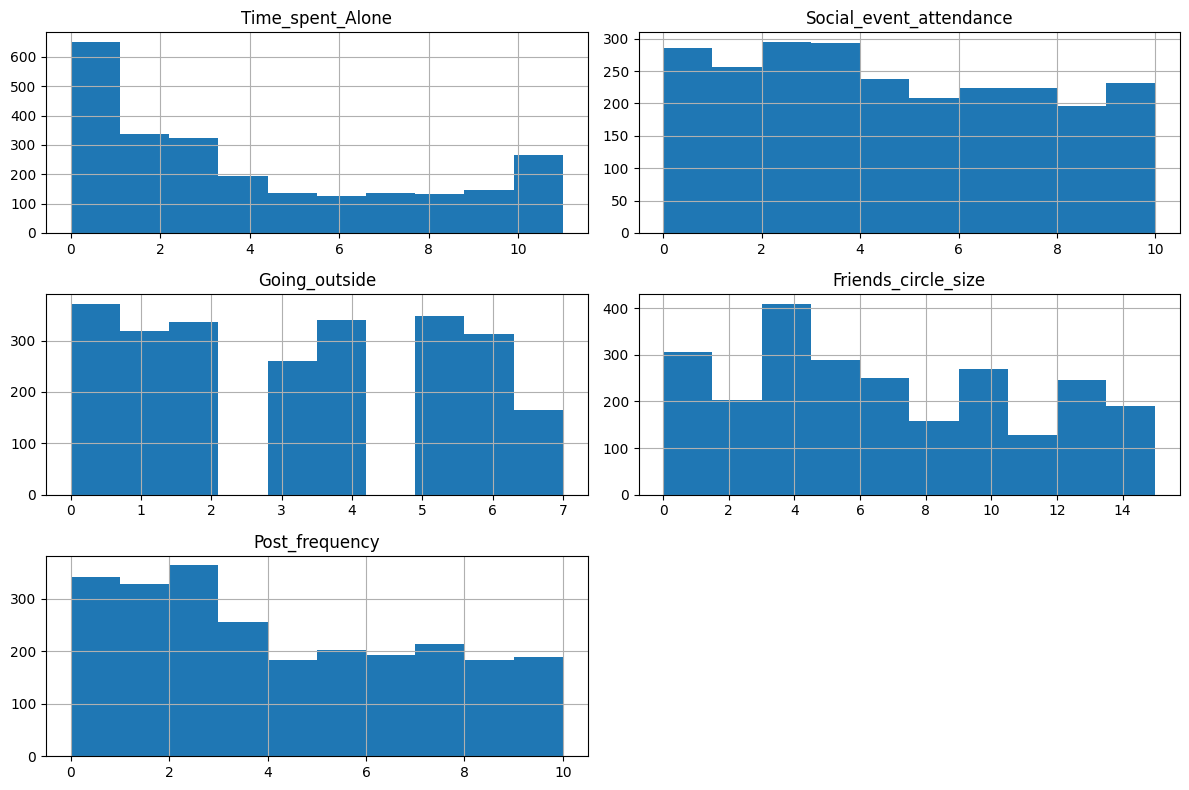

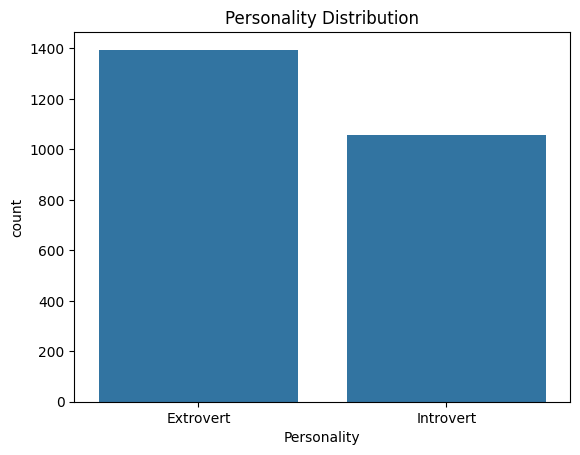

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df[num_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Count plot for Personality
sns.countplot(x='Personality', data=df)
plt.title('Personality Distribution')
plt.show()

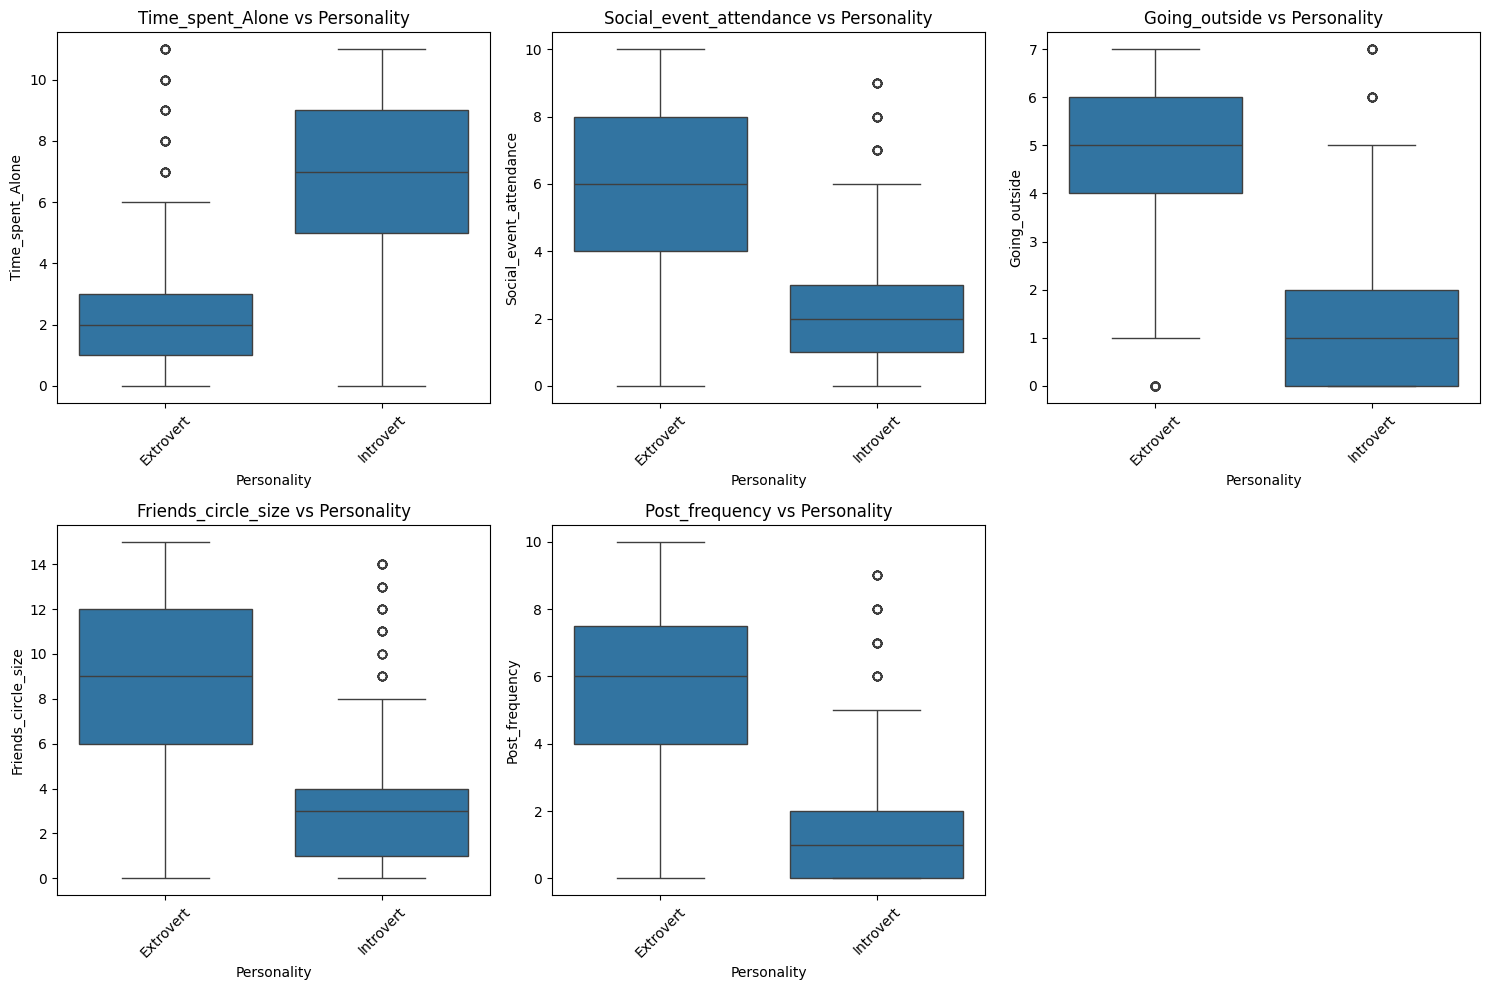

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personality', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Personality')
plt.tight_layout()
plt.show()

In [13]:
print("\nMean values for each personality type:")
print(df.groupby('Personality')[num_cols].mean())



Mean values for each personality type:
             Time_spent_Alone  Social_event_attendance  Going_outside  \
Personality                                                             
Extrovert            2.117563                 5.951254       4.587814   
Introvert            6.922422                 1.889309       1.417219   

             Friends_circle_size  Post_frequency  
Personality                                       
Extrovert               9.049462        5.589964  
Introvert               3.343425        1.523179  


In [14]:
from scipy.stats import chi2_contingency

print("\nChi-square test results for categorical variables:")
for cat in cat_cols:
    contingency = pd.crosstab(df['Personality'], df[cat])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\n{cat}:")
    print(f"Chi-square value: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")


Chi-square test results for categorical variables:

Stage_fear:
Chi-square value: 1653.39
p-value: 0.0000

Drained_after_socializing:
Chi-square value: 1646.55
p-value: 0.0000


Epoch 1/30
49/49 [==============================] - 1s 9ms/step - loss: 1.3780 - accuracy: 0.8622 - val_loss: 1.1827 - val_accuracy: 0.9186
Epoch 2/30
49/49 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.9069 - val_loss: 0.9794 - val_accuracy: 0.9186
Epoch 3/30
49/49 [==============================] - 0s 2ms/step - loss: 0.9517 - accuracy: 0.9107 - val_loss: 0.8256 - val_accuracy: 0.9186
Epoch 4/30
49/49 [==============================] - 0s 2ms/step - loss: 0.7935 - accuracy: 0.9190 - val_loss: 0.7093 - val_accuracy: 0.9186
Epoch 5/30
49/49 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.9196 - val_loss: 0.6221 - val_accuracy: 0.9186
Epoch 6/30
49/49 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.9196 - val_loss: 0.5566 - val_accuracy: 0.9186
Epoch 7/30
49/49 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.9216 - val_loss: 0.5073 - val_accuracy: 0.9186
Epoch 8/30
49/49 [==

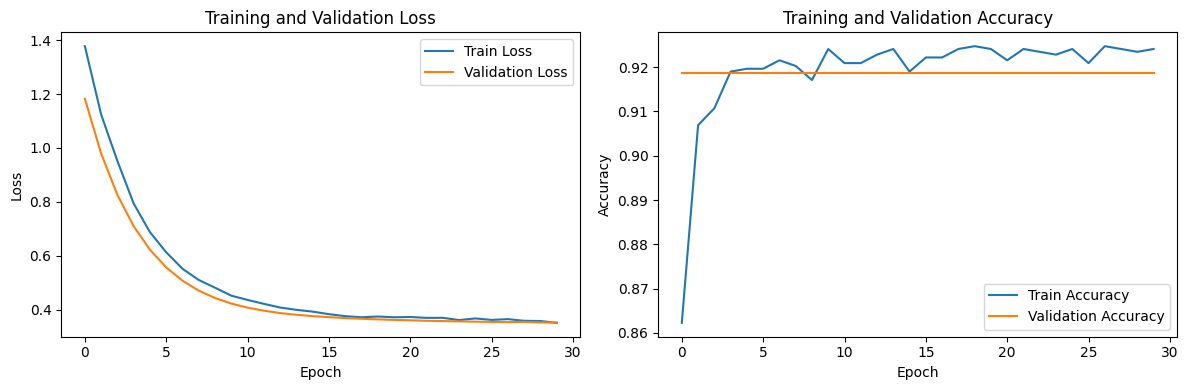

16/16 [==============================] - 0s 1ms/step

Model Evaluation:
----------------
Accuracy: 0.9308

Detailed Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       279
   Introvert       0.92      0.92      0.92       212

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



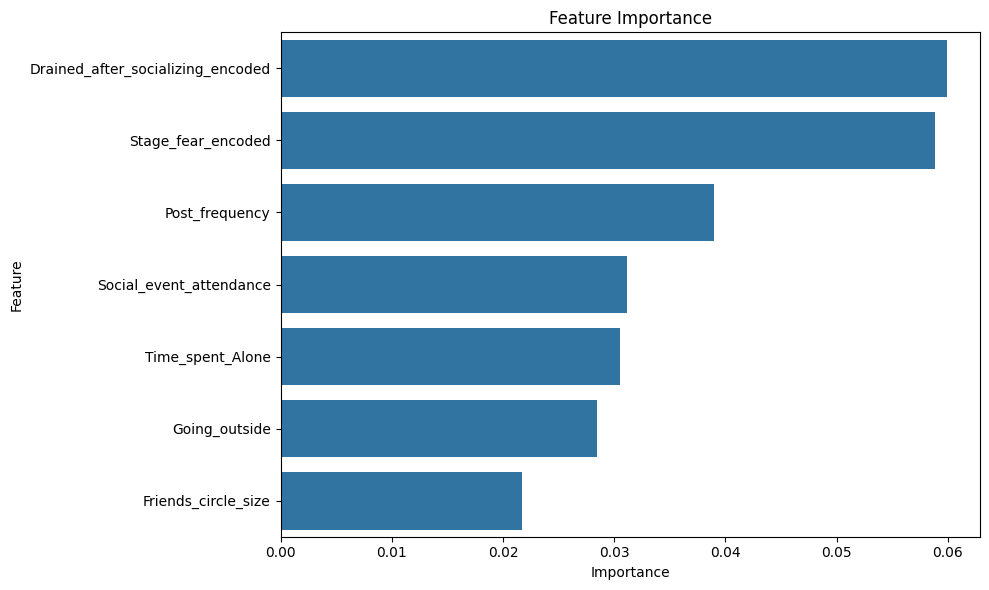

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.activations import swish
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Prepare features and target
# Encode categorical variables
le_stage = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()

df['Stage_fear_encoded'] = le_stage.fit_transform(df['Stage_fear'])
df['Drained_after_socializing_encoded'] = le_drained.fit_transform(df['Drained_after_socializing'])
y = le_personality.fit_transform(df['Personality'])

# Select and prepare features
selected_features = num_cols + ['Stage_fear_encoded', 'Drained_after_socializing_encoded']
X = df[selected_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Build the model
model = Sequential([
    Dense(16, activation=swish, input_shape=(len(selected_features),),
          kernel_regularizer=l2(0.1)),
    Dropout(0.3),
    Dense(8, activation=swish, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(len(le_personality.classes_), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print("\nModel Evaluation:")
print("----------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_classes,
                          target_names=le_personality.classes_))

# Feature importance analysis
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Epoch 1/100
32/49 [==================>...........] - ETA: 0s - loss: 1.8606 - accuracy: 0.5947 
Epoch 1: val_loss improved from inf to 1.41856, saving model to best_model.h5
49/49 [==============================] - 1s 7ms/step - loss: 1.7724 - accuracy: 0.6314 - val_loss: 1.4186 - val_accuracy: 0.9109
Epoch 2/100
34/49 [===================>..........] - ETA: 0s - loss: 1.4556 - accuracy: 0.7390
Epoch 2: val_loss improved from 1.41856 to 1.18329, saving model to best_model.h5
49/49 [==============================] - 0s 3ms/step - loss: 1.4055 - accuracy: 0.7526 - val_loss: 1.1833 - val_accuracy: 0.9186
Epoch 3/100
34/49 [===================>..........] - ETA: 0s - loss: 1.2118 - accuracy: 0.8272
Epoch 3: val_loss improved from 1.18329 to 1.01175, saving model to best_model.h5
49/49 [==============================] - 0s 3ms/step - loss: 1.1742 - accuracy: 0.8367 - val_loss: 1.0117 - val_accuracy: 0.9186
Epoch 4/100
31/49 [=================>............] - ETA: 0s - loss: 1.0568 - accurac

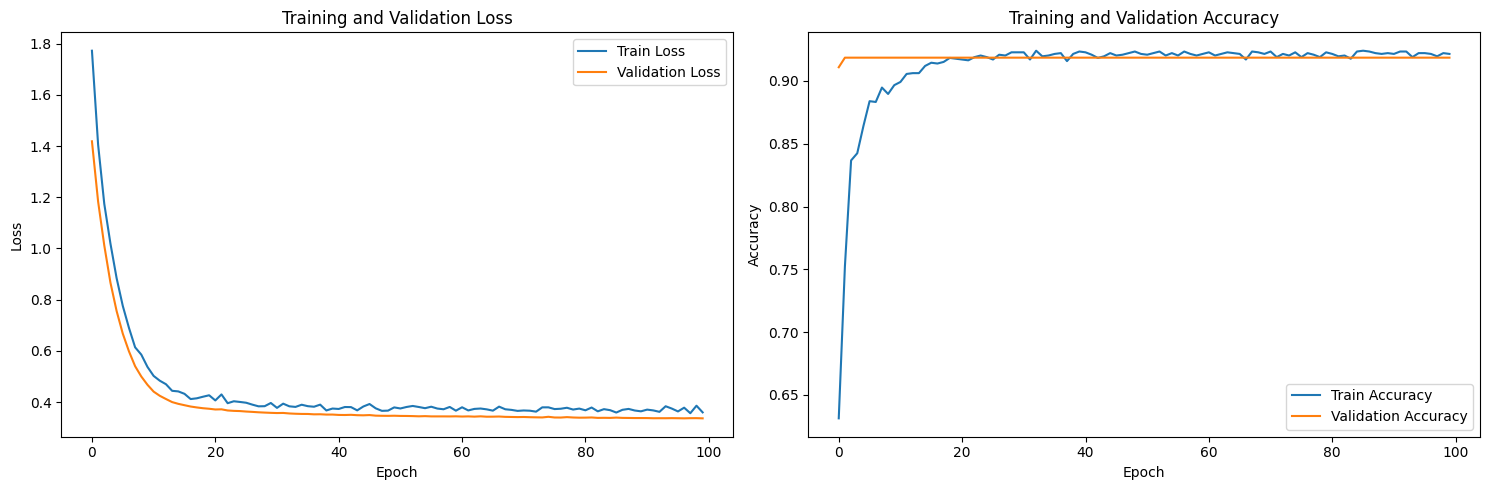

16/16 [==============================] - 0s 1ms/step

Model Evaluation:
----------------
Accuracy: 0.9308

Detailed Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       279
   Introvert       0.92      0.92      0.92       212

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



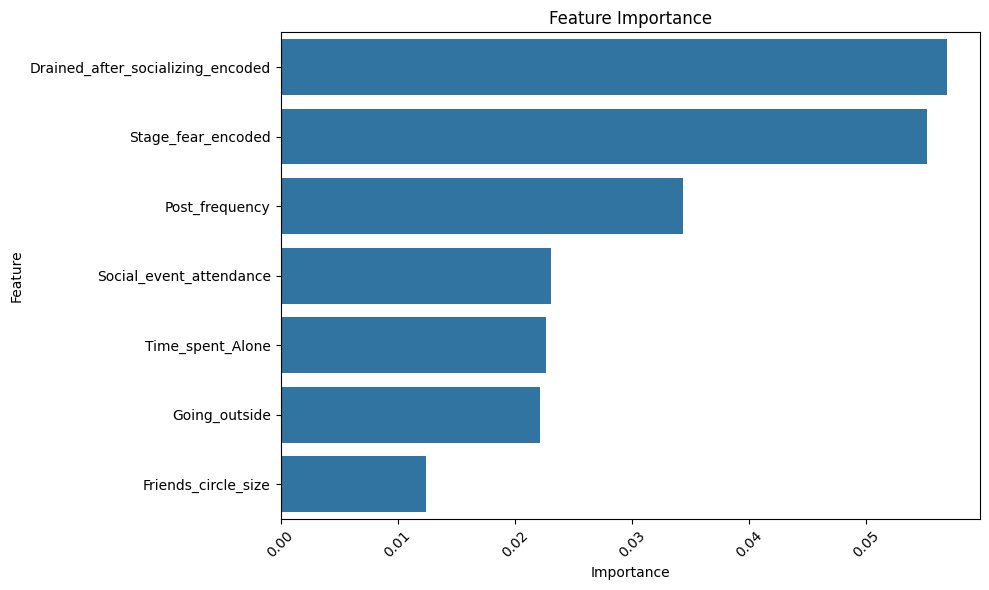

In [17]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Encode categorical variables
le_stage = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()

df['Stage_fear_encoded'] = le_stage.fit_transform(df['Stage_fear'])
df['Drained_after_socializing_encoded'] = le_drained.fit_transform(df['Drained_after_socializing'])
y = le_personality.fit_transform(df['Personality'])

# Select and prepare features
selected_features = num_cols + ['Stage_fear_encoded', 'Drained_after_socializing_encoded']
X = df[selected_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Build the model with manually tunable parameters
def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    model = Sequential([
        Dense(16, activation='swish', input_shape=(len(selected_features),),
              kernel_regularizer=l2(0.1)),
        Dropout(0.6),
        Dense(8, activation='swish', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(len(le_personality.classes_), activation='softmax')
    ])

    # Configure Adam optimizer with tunable parameters
    optimizer = Adam(
        learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon
    )

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train model
model = create_model(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.995,
    epsilon=1e-07
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Load best model
model = load_model('best_model.h5')

# Visualize training history
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Model evaluation
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print("\nModel Evaluation:")
print("----------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_classes,
                          target_names=le_personality.classes_))

# Feature importance analysis
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf
print(tf.__version__)  # Should print 2.12.0
print(tf.keras.__version__)  # Should print 2.12.0

2.12.0
2.12.0


In [18]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Epoch 1/100
30/49 [=================>............] - ETA: 0s - loss: 0.6016 - accuracy: 0.6885 
Epoch 1: val_loss improved from inf to 0.39516, saving model to best_model.h5
49/49 [==============================] - 1s 8ms/step - loss: 0.5543 - accuracy: 0.7392 - val_loss: 0.3952 - val_accuracy: 0.9135
Epoch 2/100
41/49 [========================>.....] - ETA: 0s - loss: 0.3695 - accuracy: 0.8918
Epoch 2: val_loss improved from 0.39516 to 0.36547, saving model to best_model.h5
49/49 [==============================] - 0s 8ms/step - loss: 0.3786 - accuracy: 0.8909 - val_loss: 0.3655 - val_accuracy: 0.9186
Epoch 3/100
49/49 [==============================] - ETA: 0s - loss: 0.3845 - accuracy: 0.9158
Epoch 3: val_loss improved from 0.36547 to 0.35696, saving model to best_model.h5
49/49 [==============================] - 0s 7ms/step - loss: 0.3845 - accuracy: 0.9158 - val_loss: 0.3570 - val_accuracy: 0.9186
Epoch 4/100
47/49 [===========================>..] - ETA: 0s - loss: 0.3671 - accurac

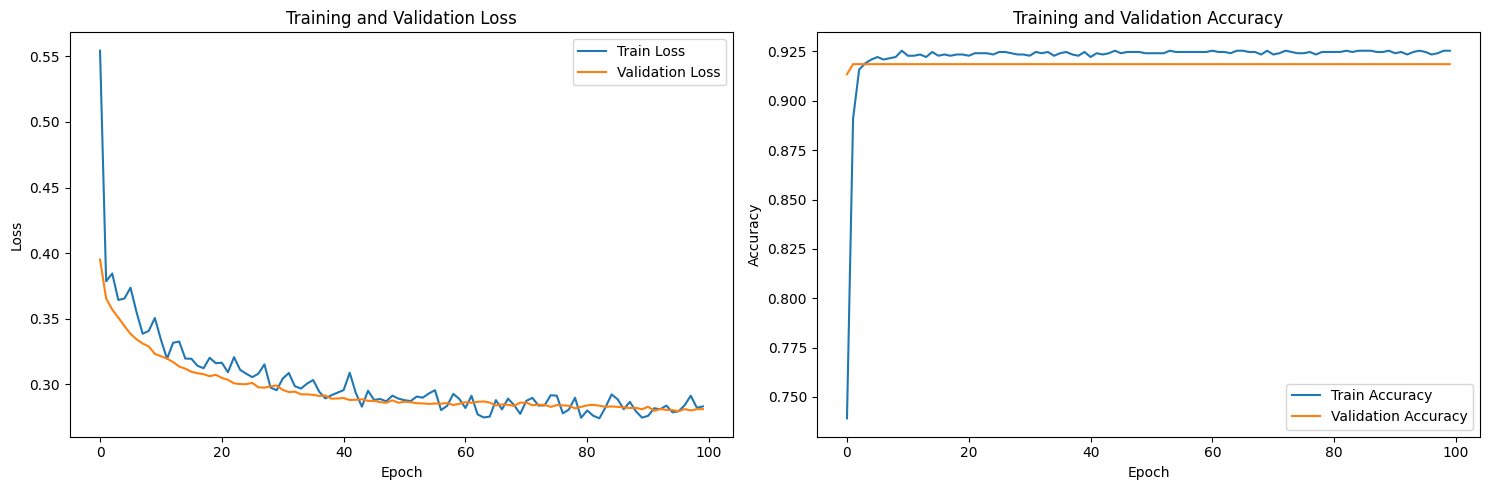

16/16 [==============================] - 0s 1ms/step

Optimal Thresholds:
Extrovert: 0.1285
Introvert: 0.8642

Evaluation with Optimized Thresholds:
Accuracy: 0.9348

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.95      0.94       279
   Introvert       0.93      0.92      0.92       212

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



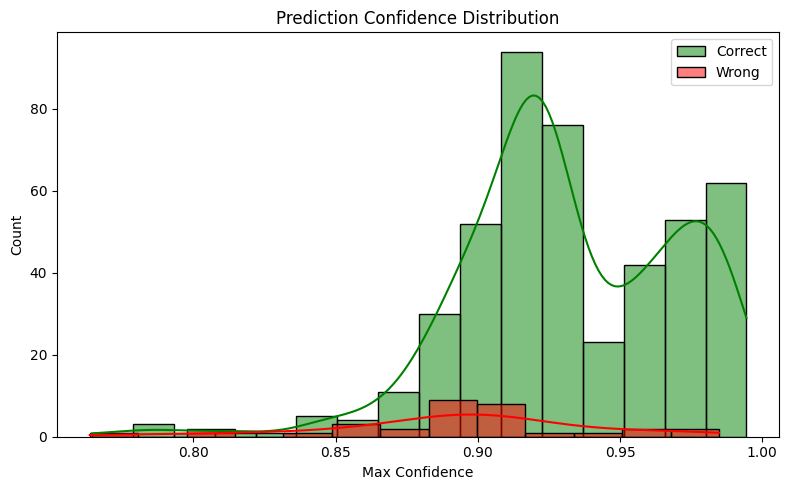


Rejected 0 low-confidence predictions out of 491


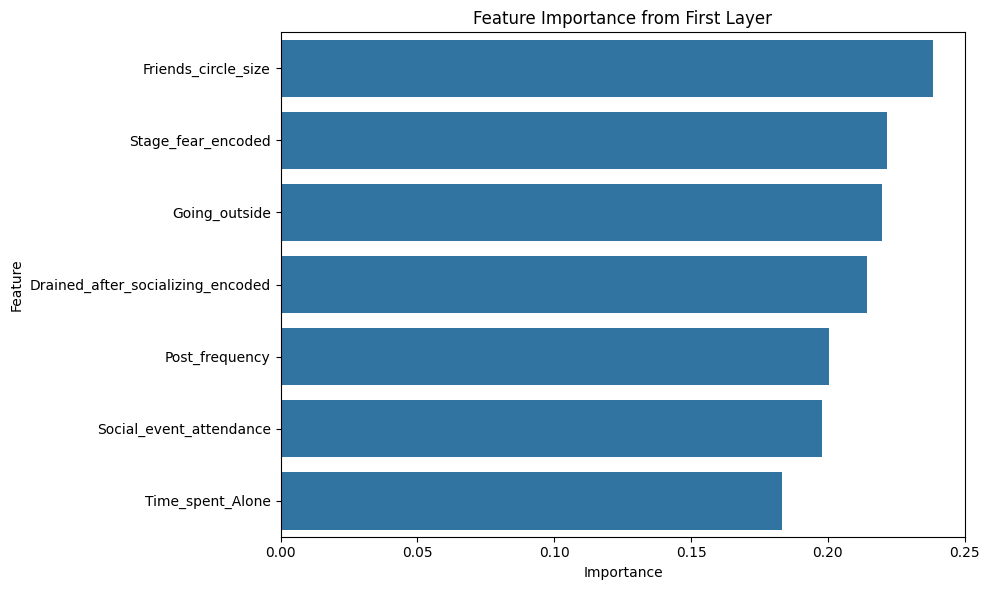

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- Data Preparation ---

le_stage = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()

df['Stage_fear_encoded'] = le_stage.fit_transform(df['Stage_fear'])
df['Drained_after_socializing_encoded'] = le_drained.fit_transform(df['Drained_after_socializing'])
y = le_personality.fit_transform(df['Personality'])

selected_features = num_cols + ['Stage_fear_encoded', 'Drained_after_socializing_encoded']
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, mode='min', verbose=1)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# --- Model Architecture ---
def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.995, epsilon=1e-07):
    model = Sequential([
        Dense(16, activation='swish', input_shape=(len(selected_features),), kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(8, activation='swish', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(len(le_personality.classes_), activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# --- Load Best Model ---
model = load_model('best_model.h5')

# --- Plot Training Curves ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --- Predict ---
y_pred = model.predict(X_test)

# --- Optimal Thresholds ---
optimal_thresholds = {}
for i, class_label in enumerate(le_personality.classes_):
    precision, recall, thresholds = precision_recall_curve((y_test == i).astype(int), y_pred[:, i])
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_threshold = thresholds[np.argmax(f1_scores)]
    optimal_thresholds[class_label] = best_threshold

print("\nOptimal Thresholds:")
for label, th in optimal_thresholds.items():
    print(f"{label}: {th:.4f}")

# --- Predict using Thresholds ---
final_preds = []
for probs in y_pred:
    assigned_class = None
    for i, class_label in enumerate(le_personality.classes_):
        if probs[i] >= optimal_thresholds[class_label]:
            assigned_class = i
            break
    if assigned_class is None:
        assigned_class = np.argmax(probs)  # fallback
    final_preds.append(assigned_class)

# --- Evaluation ---
print("\nEvaluation with Optimized Thresholds:")
print(f"Accuracy: {accuracy_score(y_test, final_preds):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_preds, target_names=le_personality.classes_))

# --- Confidence Analysis ---
confidences = y_pred.max(axis=1)
correct = (np.array(final_preds) == y_test)

plt.figure(figsize=(8, 5))
sns.histplot(confidences[correct], color='green', label='Correct', kde=True)
sns.histplot(confidences[~correct], color='red', label='Wrong', kde=True)
plt.xlabel("Max Confidence")
plt.ylabel("Count")
plt.title("Prediction Confidence Distribution")
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional Rejection Based on Confidence ---
confidence_threshold = 0.6
rejected = 0
final_preds_rejected = []

for i, prob in enumerate(y_pred):
    if prob.max() < confidence_threshold:
        final_preds_rejected.append(-1)  # reject
        rejected += 1
    else:
        final_preds_rejected.append(prob.argmax())

print(f"\nRejected {rejected} low-confidence predictions out of {len(y_pred)}")

# --- Feature Importance (First Layer Weights) ---
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance from First Layer')
plt.tight_layout()
plt.show()
